In [ ]:
arrow::read_parquet(here("data", "atpRaw.parquet"), as_data_frame = TRUE) -> atp
head(atp, 1)

,match.sets,match.tournamentRound,match.WL,opponent.name,opponent.rank,player.bornAt,player.hand,player.height,player.link,player.name,tournament.date,tournament.ground,tournament.location,tournament.name,tournament.prize
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,64 62,Semi-Finals,W,Marin Cilic,30,"Belgrade, Serbia","Right-Handed, Two-Handed Backhand",188,https://www.atptour.com/en/players/novak-djokovic/d643/player-activity?year=all&matchType=Singles,Novak Djokovic,2021.11.22 - 2021.12.05,Hard,"Madrid, Spain",Davis Cup Finals,


In [ ]:
# match count
atp %>% distinct(match.sets)

match.sets
<chr>
64 62
63 76
62 61
63 62
46 63 63
36 60 76
"76, 62"
46 67
63 63


TODO texto, mas

* uns com virgulas outros nao -> é o tiebreaker (https://sports.stackexchange.com/questions/17636/)
* uns com (RET)	-> retired
* uns nulls -> quando opponent é bye
* uns (W/O) -> walkover
* uns (DEF) -> ???TODO

In [ ]:
atp %>% filter(str_detect(match.sets,"DEF"))

match.sets,match.tournamentRound,match.WL,opponent.name,opponent.rank,player.bornAt,player.hand,player.height,player.link,player.name,tournament.date,tournament.ground,tournament.location,tournament.name,tournament.prize
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
56 (DEF),Round of 16,L,Pablo Carreno Busta,27,"Belgrade, Serbia","Right-Handed, Two-Handed Backhand",188,https://www.atptour.com/en/players/novak-djokovic/d643/player-activity?year=all&matchType=Singles,Novak Djokovic,2020.08.31 - 2020.09.13,Hard,"New York, NY, U.S.A.",US Open,"$21,656,000"
14 (DEF),Round of 16,L,Donald Young,84,"Moscow, Russia","Right-Handed, Two-Handed Backhand",198,https://www.atptour.com/en/players/daniil-medvedev/mm58/player-activity?year=all&matchType=Singles,Daniil Medvedev,2016.04.18 - 2016.04.24,Clay,"Savannah, GA, U.S.A.",Savannah,"$50,000"
"63 67, 21 (DEF)",Round of 32,W,Nick Kyrgios,36,"Oslo, Norway","Right-Handed, Two-Handed Backhand",183,https://www.atptour.com/en/players/casper-ruud/rh16/player-activity?year=all&matchType=Singles,Casper Ruud,2019.05.13 - 2019.05.19,Clay,"Rome, Italy",ATP Masters 1000 Rome,"�5,207,405"
36 46 12 (DEF),Round Robin,L,Kyle Edmund,47,"Tel Aviv, Israel","Left-Handed, One-Handed Backhand",185,https://www.atptour.com/en/players/denis-shapovalov/su55/player-activity?year=all&matchType=Singles,Denis Shapovalov,2017.01.30 - 2017.02.05,Hard,"Ottawa, Canada",CAN vs. GBR WG 1st RD,
65 (DEF),Round of 16,W,Novak Djokovic,1,"Gijon, Spain","Right-Handed, Two-Handed Backhand",188,https://www.atptour.com/en/players/pablo-carreno-busta/cd85/player-activity?year=all&matchType=Singles,Pablo Carreno Busta,2020.08.31 - 2020.09.13,Hard,"New York, NY, U.S.A.",US Open,"$21,656,000"
"67, 43 (DEF)",Finals,W,David Nalbandian,39,"Medjugorje, Bosnia-Herzegovina","Right-Handed, Two-Handed Backhand",198,https://www.atptour.com/en/players/marin-cilic/c977/player-activity?year=all&matchType=Singles,Marin Cilic,2012.06.11 - 2012.06.17,Grass,"London, Great Britain",London / Queen's Club,"�625,300"
06 44 (DEF),Round of 32,L,Bernabe Zapata Miralles,147,"Sanremo, Italy","Right-Handed, Two-Handed Backhand",178,https://www.atptour.com/en/players/fabio-fognini/f510/player-activity?year=all&matchType=Singles,Fabio Fognini,2021.04.19 - 2021.04.25,Clay,"Barcelona, Spain",Barcelona,"�1,565,480"
65 (DEF),2nd Round Qualifying,W,Damir Dzumhur,125,"Wageningen, Netherlands","Right-Handed, Two-Handed Backhand",191,https://www.atptour.com/en/players/botic-van-de-zandschulp/v812/player-activity?year=all&matchType=Singles,Botic van de Zandschulp,2021.03.15 - 2021.03.20,Hard,"Acapulco, Mexico",Acapulco,"$1,053,910"
46 75 (DEF),Round of 16,W,Corentin Moutet,92,"Senta, Serbia","Right-Handed, Two-Handed Backhand",188,https://www.atptour.com/en/players/laslo-djere/db63/player-activity?year=all&matchType=Singles,Laslo Djere,2022.01.03 - 2022.01.09,Hard,"Adelaide, Australia",Adelaide 1,"$416,800"


In [ ]:
# features
atp %>% mutate(
    match.sets          = ifelse(str_detect(match.sets, "null") | str_trim(match.sets) == "", NA, match.sets),
    match.wasRet        = match.sets %>% str_detect("RET"),
    match.hadTieBreaker = match.sets %>% str_detect(","),
    match.wasWalkover   = match.sets %>% str_detect("W/O"),
    match.wasDef        = match.sets %>% str_detect("DEF")
) %>% 
    mutate(match.sets = str_remove_all(match.sets, "(?i)\\(RET\\)|\\(W/O\\)|\\(DEF\\)|,") %>% str_squish()) %>%
    mutate(match.setsCount = str_count(match.sets, " ") + 1) -> atpS

In [ ]:
atpS %>% select(contains("match"))

,match.sets,match.tournamentRound,match.WL,match.wasRet,match.hadTieBreaker,match.wasWalkover,match.wasDef,match.setsCount
,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>
1,64 62,Semi-Finals,W,FALSE,FALSE,FALSE,FALSE,2
2,63 76,Round of 16,W,FALSE,FALSE,FALSE,FALSE,2
3,62 61,Round Robin,W,FALSE,FALSE,FALSE,FALSE,2
4,63 62,Round Robin,W,FALSE,FALSE,FALSE,FALSE,2
5,46 63 63,Finals,W,FALSE,FALSE,FALSE,FALSE,3
6,36 60 76,Semi-Finals,W,FALSE,FALSE,FALSE,FALSE,3
7,76 62,Round Robin,W,FALSE,TRUE,FALSE,FALSE,2
8,63 62,Round Robin,W,FALSE,FALSE,FALSE,FALSE,2
9,46 67,Quarter-Finals,L,FALSE,FALSE,FALSE,FALSE,2


In [ ]:
atpS %>% 
    filter(!match.wasRet, !match.wasWalkover, !match.wasDef) %>%
    filter(match.setsCount == 1)

match.sets,match.tournamentRound,match.WL,opponent.name,opponent.rank,player.bornAt,player.hand,player.height,player.link,player.name,tournament.date,tournament.ground,tournament.location,tournament.name,tournament.prize,match.wasRet,match.hadTieBreaker,match.wasWalkover,match.wasDef,match.setsCount
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>
40,Round of 32,W,Mario Ancic,9,"Bolzano, Italy","Right-Handed, Two-Handed Backhand",191,https://www.atptour.com/en/players/andreas-seppi/sa93/player-activity?year=all&matchType=Singles,Andreas Seppi,2007.02.12 - 2007.02.18,Hard,"Marseille, France",Marseille,"$575,000",FALSE,FALSE,FALSE,FALSE,1
50,Round of 32,W,Maxim Tybar,1597,"Muehlacker, Germany","Left-Handed, Two-Handed Backhand",180,https://www.atptour.com/en/players/cedrik-marcel-stebe/sk94/player-activity?year=all&matchType=Singles,Cedrik-Marcel Stebe,2015.02.23 - 2015.03.01,Hard,"Antalya, Turkey",Turkey F8,"$10,000",FALSE,FALSE,FALSE,FALSE,1
63,Round of 16,W,Enrico Dalla Valle,745,"Hostalric, Spain","Right-Handed, One-Handed Backhand",180,https://www.atptour.com/en/players/tommy-robredo/r419/player-activity?year=all&matchType=Singles,Tommy Robredo,2018.08.13 - 2018.08.19,Clay,"Cordenons, Italy",Cordenons,"�64,000",FALSE,FALSE,FALSE,FALSE,1
12,Round of 32,L,Martins Podzus,763,"St. Petersburg, Russia","Right-Handed, Two-Handed Backhand",185,https://www.atptour.com/en/players/ivan-nedelko/n561/player-activity?year=all&matchType=Singles,Ivan Nedelko,2014.07.14 - 2014.07.20,Clay,Estonia,Estonia F1,"$10,000",FALSE,FALSE,FALSE,FALSE,1
41,Round of 32,W,Jan Hajek,84,"Sao Paulo, Brazil","Right-Handed, One-Handed Backhand",178,https://www.atptour.com/en/players/rogerio-dutra-silva/sc73/player-activity?year=all&matchType=Singles,Rogerio Dutra Silva,2012.07.23 - 2012.07.28,Clay,"Kitzbuhel, Austria",Kitzbuhel,"�358,425",FALSE,FALSE,FALSE,FALSE,1
36,Round of 16,L,Tommy Robredo,207,Ravenna,"Right-Handed, Two-Handed Backhand",196,https://www.atptour.com/en/players/enrico-dalla-valle/dg80/player-activity?year=all&matchType=Singles,Enrico Dalla Valle,2018.08.13 - 2018.08.19,Clay,"Cordenons, Italy",Cordenons,"�64,000",FALSE,FALSE,FALSE,FALSE,1
21,Round of 32,W,Ivan Nedelko,434,"Riga, Latvia","Right-Handed, Two-Handed Backhand",188,https://www.atptour.com/en/players/martins-podzus/pg04/player-activity?year=all&matchType=Singles,Martins Podzus,2014.07.14 - 2014.07.20,Clay,Estonia,Estonia F1,"$10,000",FALSE,FALSE,FALSE,FALSE,1
40,1st Round Qualifying,W,Luca Grifoni,-,,null,NA,https://www.atptour.com/en/players/walter-trusendi/t868/player-activity?year=all&matchType=Singles,Walter Trusendi,2012.05.07 - 2012.05.12,Clay,"Rome, Italy",Rome-2,"�30,000",FALSE,FALSE,FALSE,FALSE,1
5,Round of 32,L,Cedrik-Marcel Stebe,-,"Minsk, Belarus","Right-Handed, Two-Handed Backhand",NA,https://www.atptour.com/en/players/maxim-tybar/tg53/player-activity?year=all&matchType=Singles,Maxim Tybar,2015.02.23 - 2015.03.01,Hard,"Antalya, Turkey",Turkey F8,"$10,000",FALSE,FALSE,FALSE,FALSE,1


TODO texto, mas:
* alguns tem retired sem retired: https://www.itftennis.com/en/tournament/marseille/fra/2007/m-is-fra-01a-2007/draws-and-results/ 
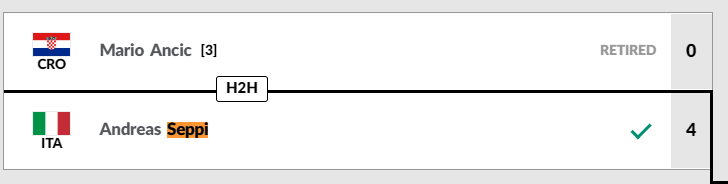
* alguns com tracos inconsistentes (https://www.atptour.com/en/players/richard-villegas/v286/player-activity?year=all&matchType=Singles vs https://www.atptour.com/en/players/pedro-braga/b478/player-activity?year=all&matchType=Singles 60-610 vs 6-6001 
    * https://www.itftennis.com/en/tournament/venice-challenger/ita/1993/m-ch-ita-05a-1993/draws-and-results/ vs https://www.atptour.com/en/players/renzo-furlan/f192/player-activity?year=all&matchType=Singles foi 2 sets
* alguns com numeros singulares (sao jogos que estava por exempo 05, que ao recolher foi transformado em 5)(n da problema, o problema continua a ser o 1 set) 

In [ ]:
# checking how many lines with 1
atpS %>% 
    filter(!match.wasRet, !match.wasWalkover, !match.wasDef) %>%
    filter(match.setsCount == 1) %>% 
    group_by(str_count(match.sets, "-")) %>% 
    summarise(fSets = first(match.sets), flink = first(player.link), count = n())

"str_count(match.sets, ""-"")",fSets,flink,count
<int>,<chr>,<chr>,<int>
0,40,https://www.atptour.com/en/players/andreas-seppi/sa93/player-activity?year=all&matchType=Singles,41
1,60-610,https://www.atptour.com/en/players/pedro-braga/b478/player-activity?year=all&matchType=Singles,18
2,11-1311-1346,https://www.atptour.com/en/players/stefan-edberg/e004/player-activity?year=all&matchType=Singles,4


In [ ]:
atpS %>% 
    mutate(
        match.setsCount = ifelse(
            !match.wasRet & !match.wasWalkover & !match.wasDef & match.setsCount == 1, #condition
            str_count(match.sets, "-")+1, #if yes 
            match.setsCount #if not
        ),
        match.wasRet = ifelse(
            !match.wasRet & !match.wasWalkover & !match.wasDef & match.setsCount == 1, #with new setsCount
            TRUE, #if it's still one after
            match.wasRet #dont change
        )
    ) -> atpSF
atpSF %>% 
    filter(!match.wasRet, !match.wasWalkover, !match.wasDef) %>%
    filter(match.setsCount == 1) %>%
    nrow() #supposed to be 0

[1] 0

In [ ]:
# a melhor de 3 ou de 5

atpSF %>% 
    filter(!match.wasRet, !match.wasWalkover, !match.wasDef) %>%
    group_by(tournament.name, tournament.date, match.tournamentRound) %>% 
    summarise(minSetC = min(match.setsCount), maxSetC = max(match.setsCount)) %>%
    filter(minSetC < 3 & maxSetC > 3 & match.tournamentRound != "Round Robin")

`summarise()` has grouped output by 'tournament.name', 'tournament.date'. You can override using the `.groups` argument.


tournament.name,tournament.date,match.tournamentRound,minSetC,maxSetC
<chr>,<chr>,<chr>,<dbl>,<dbl>
Aptos,2007.07.16 - 2007.07.22,Round of 16,2,4
Bombay,1995.05.01 - 1995.05.07,Round of 32,2,4
Casablanca,1990.10.08 - 1990.10.14,Round of 16,2,4
Casablanca,1990.10.08 - 1990.10.14,Round of 32,2,4
Croydon,1990.02.12 - 1990.02.18,Round of 32,2,4
Heilbronn,1990.01.22 - 1990.01.28,Round of 32,2,4
Mexico F2,2002.03.11 - 2002.03.24,Round of 16,2,4
U.S.A. F24,2007.09.24 - 2007.09.30,Round of 32,2,4


In [ ]:
atpSF %>% 
    filter(!match.wasRet, !match.wasWalkover, !match.wasDef) %>%
    group_by(tournament.name, tournament.date, match.tournamentRound) %>% 
    summarise(minSetC = min(match.setsCount), maxSetC = max(match.setsCount)) %>%
    filter(minSetC == 3 & maxSetC == 3)

`summarise()` has grouped output by 'tournament.name', 'tournament.date'. You can override using the `.groups` argument.


tournament.name,tournament.date,match.tournamentRound,minSetC,maxSetC
<chr>,<chr>,<chr>,<dbl>,<dbl>
's-Hertogenbosch,1999.06.14 - 1999.06.20,Finals,3,3
's-Hertogenbosch,2002.06.17 - 2002.06.23,Finals,3,3
's-Hertogenbosch,2006.06.19 - 2006.06.25,Finals,3,3
's-Hertogenbosch,2007.06.18 - 2007.06.24,Finals,3,3
's-Hertogenbosch,2009.06.15 - 2009.06.21,Semi-Finals,3,3
's-Hertogenbosch,2014.06.16 - 2014.06.21,Finals,3,3
AG2 BAR vs. GUA,2017.04.03 - 2017.04.09,Round Robin,3,3
AG2 GUA vs. MEX 1st Round,2017.01.30 - 2017.02.05,Round Robin,3,3
AG2 PAR vs. BAR 1st Round,2017.01.30 - 2017.02.05,Round Robin,3,3


Algumas coisas podemos concluir da analise:

* O mesmo torneio pode ter à melhor de 3 ou à melhor de 5.
* Todas as mesmas rondas vão ser à melhor de 3 ou à melhor de 5, excepto *Round Robin*s e estas 8.
* Há rondas de torneios que tiverem sempre 3 sets.

A transformação desta coluna pode ficar mais obvio pós-transformação para `matches`